<a href="https://colab.research.google.com/github/AndresUrregoAngel/CBB/blob/master/AI/SupervisedML/model_breat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**College Bois de Bologne - AEC Machine Learning and AI**

**TP Supervised Algorithms**

**Student: Andres Urrego**


This work is based on a specific dataset about breast cancer, the purpose is develop and deploy a model based on *KNN* clasification model to recognize the class which moves between 2 and 4.

1. The first step is load the  dataset I have stored in my public github account into a dataframe to start the data exploration and cleaning.

In [3]:
import pandas as pd

dfraw = pd.read_csv('https://raw.githubusercontent.com/AndresUrregoAngel/CBB/master/AI/data/breast.data',sep=',')


#Clean the question marks from 'Bare_Nuclei'

dfraw['Bare_Nuclei'].where(dfraw['Bare_Nuclei'] != '?',0 ,inplace=True)
dfraw['Bare_Nuclei'] = dfraw['Bare_Nuclei'].apply(lambda x: int(x))

# check out any null within the data
print("*"*10,"Columns with null values","*"*10)
print(dfraw.isnull().sum())
print("*"*10,"Columns data type","*"*10)
print(dfraw.dtypes)

********** Columns with null values **********
id_number                      0
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64
********** Columns data type **********
id_number                      int64
Clump_Thickness                int64
Uniformity_Cell_Size           int64
Uniformity_Cell_Shape          int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


There are not null values within any of the predictors and target, however is key analize the way how the data moves around the target and this is why I use a pair plot to verify the relationships among the predictors and the target `Class` , finally I will join a heat map so verify the correlation.

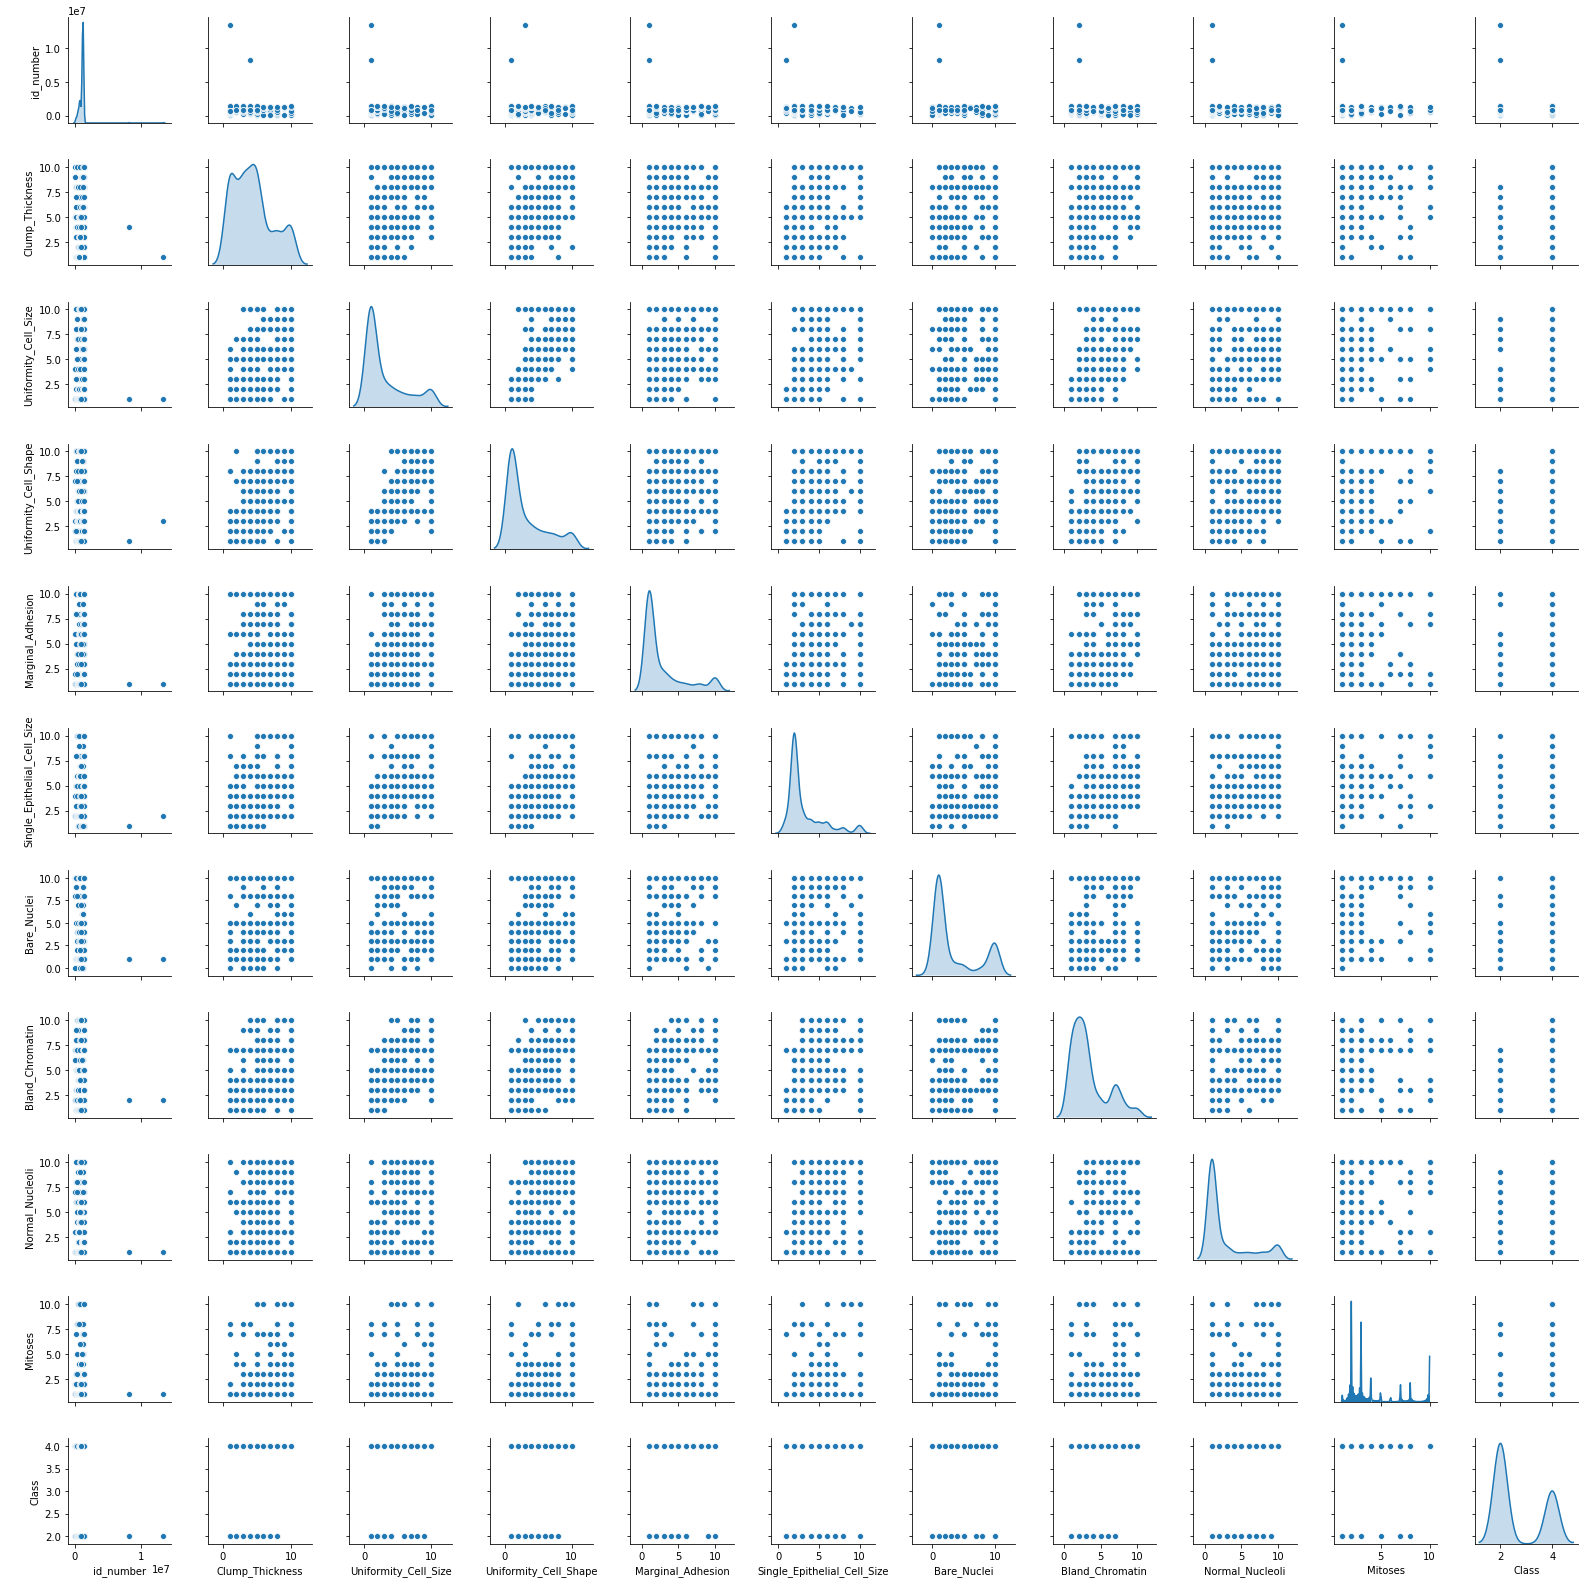

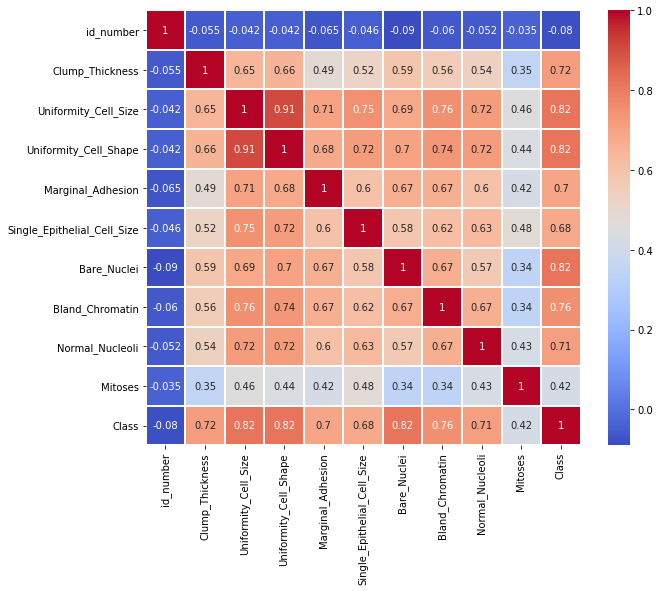

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#Printing a parplot 
sns.pairplot(dfraw,
            height=2,
            diag_kind='kde',
             dropna=True
            )

#Printing heat map

corr = dfraw.corr()
corr = corr.round(3)
f , ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(100,10, as_cmap=True)
_ = sns.heatmap(corr,cmap='coolwarm',square=True, ax=ax,annot=True, linewidth=1.0 )

Clarly we can notice a definetelly no linear model due to the data is all dispers and moving differently against every variable, thus , the heatmap let us see the strong correlation between the predictors and the target. For instance count with the column `id_number` is really irrelevant due to the very low correlation with our column `Class`. F

2. Developing the KNN model

This clasification model will learn based on the closest neighboard to know how properly classify the target, it's not really based on any split for training and testing because instead the model needs to walk throughout the entire dataset looking for the variable importance to see a `Class 2 or 4`.  Somehow on the flight the algorithm will will be pulling off the variables without any relevance for the leanring process.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

features= dfraw.drop(['Class','id_number'],axis=1)
target = dfraw['Class']

#Create standarizer
standarizer = StandardScaler()

#Standarize Features
features_standarize = standarizer.fit_transform(features)


#Split train and test data 80% train and 20% test
X_train, X_test , y_train, y_test = train_test_split( features_standarize,target,test_size=0.2,random_state=42)


One of the best strategies to figure out how many neighborgs should we consider into our KNN model is execute a `GridSearchCV` feature which will retrieve the ideal quatity of neighbors. This is part of the sklearn library , and here is how this works:

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)

#Create Pipeline
pipeline = Pipeline([("standarizer", standarizer),("knn",knn)])

#Create a dictionary for the possible values to be tested in our model
search_space = [{"knn__n_neighbors":[1,2,3,4,5,6,7,8,9,10]}]

#Create grid search
classifier = GridSearchCV(pipeline,search_space,cv=5,verbose=0).fit(X_train,y_train)

#Best neighborhood size (k)
print("the best neighborhood number to use on the model is:{}".
      format(classifier.best_estimator_.get_params()["knn__n_neighbors"]))

the best neighborhood number to use on the model is:6


Now we deploy a model with a more accurate number of close neighbors to let the model learn from the data around.

In [0]:

# Final model with the suggested K size
nearest_neighbors = KNeighborsClassifier(n_neighbors=5 , n_jobs=-1).fit(X_train,y_train)

Once the model is built and before move forward with a few new observations of the predictions look, I will execute few validations in order to validate the model performance. Ideally the accuracy should be high to guarantee that our model has enough learning capacity that could let it predict properly.

In [10]:
from sklearn.metrics import accuracy_score

y_pred = nearest_neighbors.predict(X_test)

print("model accuracy: {}".format(accuracy_score(y_test,y_pred)))

model accuracy: 0.9714285714285714


Finally, I dump to my model a predefined observation for this TP `[4,2,1,1,1,2,3,2,1]`, this will allow us validate how the model should properly prpedict againts any unknown observations feed in our classifier.

In [0]:
import numpy as np

new_observations =np.array([[4,2,1,1,1,2,3,2,1]])

# Dump the prediction based on the new observation

print("The final prediction is :",nearest_neighbors.predict(new_observations))

The final prediction is : [4]


Now I'm going to execute the same data but under a different approach deploying a decision tree

model accuracy: 0.95
model F1 score: 0.9408748114630467
model precision score: 0.9575


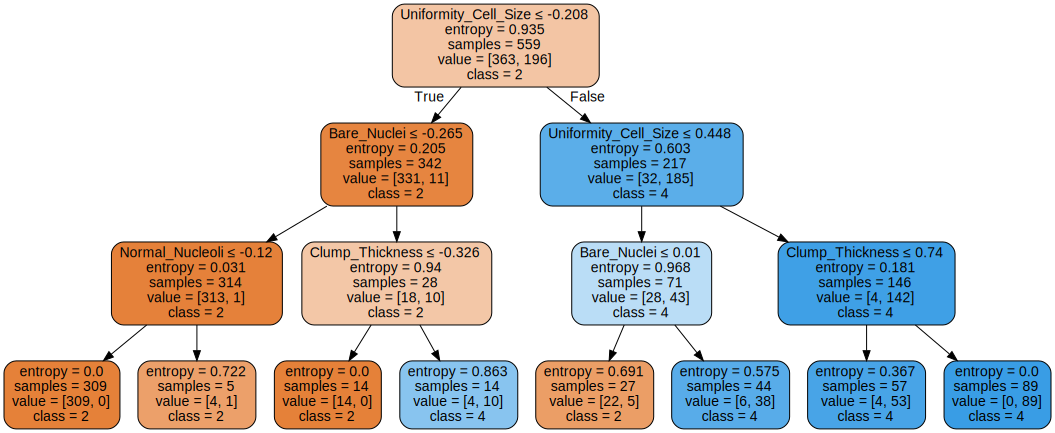

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score
from sklearn.tree import export_graphviz
import graphviz

classifier = DecisionTreeClassifier(criterion='entropy', random_state=44, max_depth=3, min_samples_leaf=5) 
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("model accuracy: {}".format(accuracy_score(y_test,y_pred)))
print("model F1 score: {}".format(f1_score(y_test,y_pred,average='macro')))
print("model precision score: {}".format(precision_score(y_test,y_pred,average='macro')))


#### Vizualise the graph
colnames = features.columns.tolist()
dot_data = export_graphviz(classifier, out_file=None,
                          feature_names = colnames, class_names=['2','4'], filled= True , rounded = True,
                          special_characters =True)


graph = graphviz.Source(dot_data)
graph


Now the same decision tree but runnig under the `gini` feature to compare the accuracy

model accuracy: 0.9285714285714286
model F1 score: 0.9190564292321926
model precision score: 0.9146648364218715


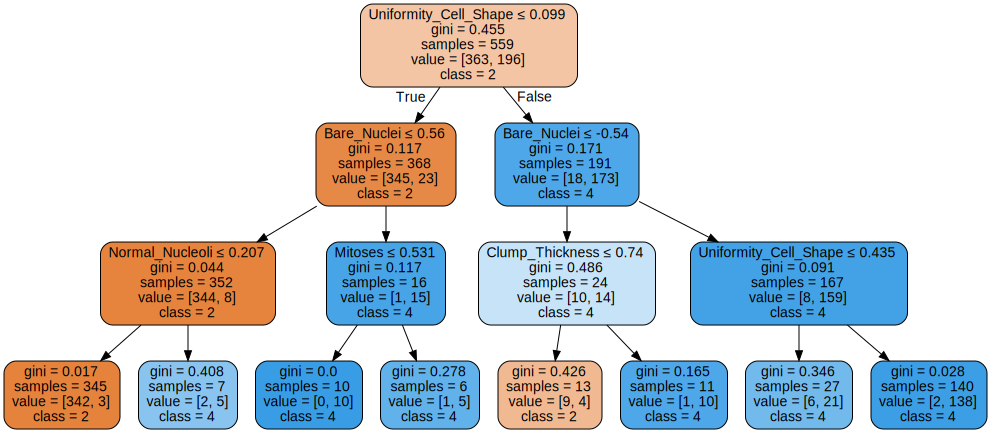

In [21]:
classifier = DecisionTreeClassifier(criterion='gini', random_state=44, max_depth=3, min_samples_leaf=5) 
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("model accuracy: {}".format(accuracy_score(y_test,y_pred)))
print("model F1 score: {}".format(f1_score(y_test,y_pred,average='macro')))
print("model precision score: {}".format(precision_score(y_test,y_pred,average='macro')))

#### Vizualise the graph
dot_data = export_graphviz(classifier, out_file=None,
                          feature_names = colnames, class_names=['2','4'], filled= True , rounded = True,
                          special_characters =True)


graph = graphviz.Source(dot_data)
graph

